In [13]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, TensorDataset
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

import matplotlib.pyplot as plt
from torchsummary import summary
import numpy as np

In [14]:
# 데이터셋 인스턴스 생성

data = pd.read_csv('C:/Users/hanyo/Downloads/Mall_customers.csv')  # CSV 파일 경로
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [15]:
print("결측치 개수 확인:\n", data.isna().sum())

결측치 개수 확인:
 CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [16]:
data = data.dropna()

In [17]:
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


C:\Users\hanyo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 48276 (\N{HANGUL SYLLABLE BEOM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\hanyo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50948 (\N{HANGUL SYLLABLE WI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\hanyo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\hanyo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\hanyo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


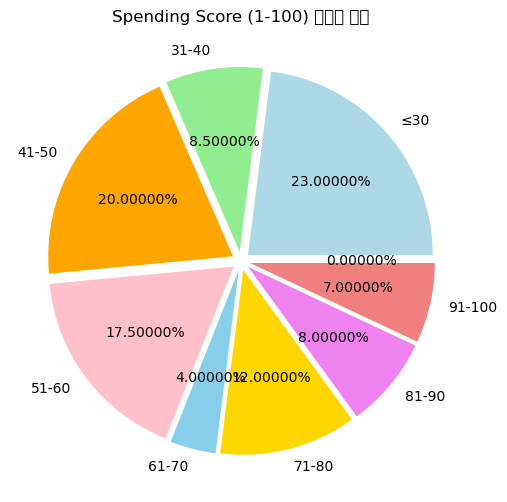

In [18]:
import matplotlib.pyplot as plt
import pandas as pd

# Spending Score (1-100) 값 범위로 구간 나누기
bins = [0, 30, 40, 50, 60, 70, 80, 90, 100, float('inf')]
labels = ['≤30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100', '100+']
bp_binned = pd.cut(data['Spending Score (1-100)'], bins=bins, labels=labels, right=True, include_lowest=True)

# 구간별 개수 세기
counts = bp_binned.value_counts().sort_index()

# 파이차트 크기 조정
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 8
fig_size[1] = 6
plt.rcParams["figure.figsize"] = fig_size

# 파이차트 그리기
counts.plot(kind='pie',
            autopct='%0.05f%%',
            colors=['lightblue', 'lightgreen', 'orange', 'pink', 'skyblue', 'gold', 'violet', 'lightcoral', 'khaki'],
            explode=[0.05] * len(counts),
            ylabel='')  # ylabel 없애서 깔끔하게
plt.title('Spending Score (1-100) 범위별 분포')
plt.show()

In [21]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [22]:
columns = ['CustomerID', 'Gender','Age','Annual Income (k$)','Spending Score (1-100)']

In [23]:
label_encoders = {}
for column in columns:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,1,1,0,30
1,1,1,3,0,67
2,2,0,2,1,4
3,3,0,5,1,64
4,4,0,13,2,31
...,...,...,...,...,...
195,195,0,17,61,66
196,196,0,27,62,23
197,197,1,14,62,61
198,198,1,14,63,16


In [24]:
# 데이터와 타겟 분리
# X = data.drop('BloodPressure', axis=1).values
# y = data['BloodPressure'].values

# 특징(X), 라벨(y) 분리
X = data.drop('Spending Score (1-100)', axis=1).values
y = data['Spending Score (1-100)'].values.reshape(-1, 1)  # (batch, 1)

In [25]:
# 정규화
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


scaler_X = StandardScaler()
scaler_y = StandardScaler()
X = scaler_X.fit_transform(X)
y = scaler_y.fit_transform(y)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [26]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape, 

((160, 4), (40, 4), (160, 1), (40, 1))

In [27]:
# Convert to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.int64)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.int64)

In [28]:
# Create DataLoader
train_dataset = TensorDataset(X_train, y_train)
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)

test_dataset = TensorDataset(X_test, y_test)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [29]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape


(torch.Size([160, 4]),
 torch.Size([40, 4]),
 torch.Size([160, 1]),
 torch.Size([40, 1]))

In [30]:
# 모델 정의

class Mall(nn.Module):
    def __init__(self, input_dim):
        super(Mall, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1)
        )
    
    def forward(self, x):
        return self.model(x)

model = Mall(input_dim=X.shape[1])

In [39]:
# 손실함수 설정 , 옵티마이저 설정

criterion = nn.MSELoss()  # 분류는 CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [40]:
# Variables to store loss and accuracy
train_losses = []
test_accuracies = []

In [41]:
epochs = 100
for epoch in range(epochs):
    model.train()
    for inputs, labels in train_dataloader:
        inputs = inputs.float()       # 모델 입력은 float
        labels = labels.float()       # 회귀에서는 라벨도 float!

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    if (epoch+1) % 10 == 0:
        print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}")

Epoch 10/100, Loss: 0.2687
Epoch 20/100, Loss: 0.1394
Epoch 30/100, Loss: 0.2111
Epoch 40/100, Loss: 0.1219
Epoch 50/100, Loss: 0.1141
Epoch 60/100, Loss: 0.1459
Epoch 70/100, Loss: 0.2920
Epoch 80/100, Loss: 0.2566
Epoch 90/100, Loss: 0.1975
Epoch 100/100, Loss: 0.0513


In [42]:
model.eval()
with torch.no_grad():
    predictions = model(X_test)
    test_loss = criterion(predictions, y_test)
    print(f"Test Loss (MSE): {test_loss.item():.4f}")

Test Loss (MSE): 0.3083


C:\Users\hanyo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\hanyo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\hanyo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44208 (\N{HANGUL SYLLABLE GYEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\hanyo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44284 (\N{HANGUL SYLLABLE GWA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


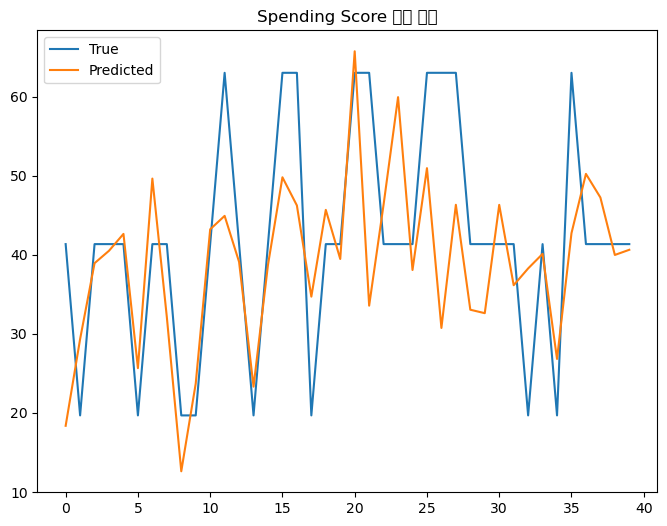

In [43]:
# 예측 및 실제 값 되돌리기
pred_np = scaler_y.inverse_transform(predictions.numpy())
true_np = scaler_y.inverse_transform(y_test.numpy())

# 시각화 등 가능
import matplotlib.pyplot as plt

plt.plot(true_np, label='True')
plt.plot(pred_np, label='Predicted')
plt.legend()
plt.title('Spending Score 예측 결과')
plt.show()